In [360]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img_orig = cv2.imread('data/img2.jpg',0)
template = cv2.imread('data/template2.jpg',0)
template = cv2.resize(template, (100, 100))
# template = 255 - template
_, template_orig = cv2.threshold(template, 180, 255, cv2.THRESH_BINARY_INV)

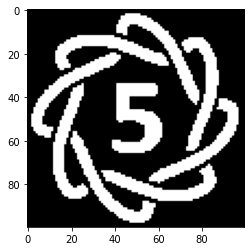

In [361]:
plt.imshow(template_orig, cmap='Greys_r')

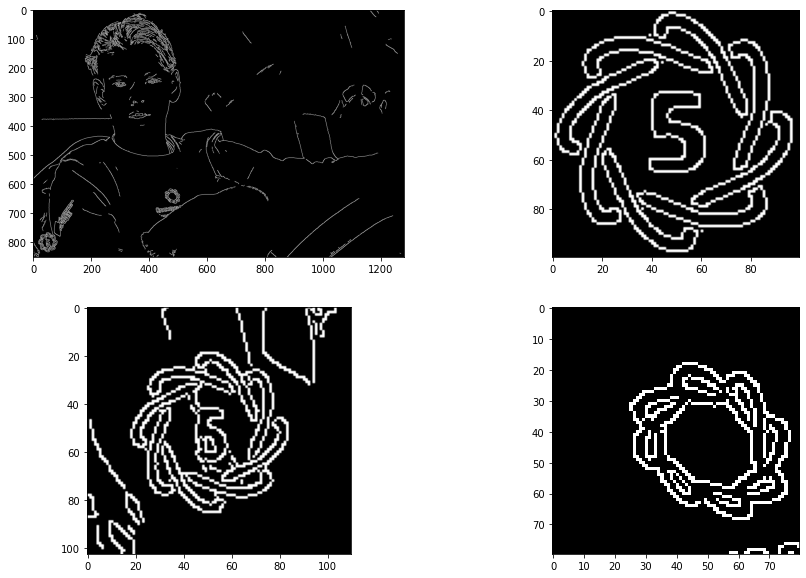

In [369]:
threshold1 = 140
threshold2 = 210

template = cv2.GaussianBlur(template_orig, (3, 3), 1)
img = cv2.GaussianBlur(img_orig, (3, 3), 1)

img_edges = cv2.Canny(img, threshold1, threshold2)
template_edges = cv2.Canny(template, threshold1, threshold2)

# size = 5
# img_edges = cv2.GaussianBlur(img_edges, (size, size), 1)
# template_edges = cv2.GaussianBlur(template_edges, (size, size), 1)

plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
plt.imshow(img_edges, cmap='Greys_r')
plt.subplot(2, 2, 2)
plt.imshow(template_edges, cmap='Greys_r')
plt.subplot(2, 2, 3)
# plt.imshow(img_edges[420:520, 260:340], cmap='Greys_r')
plt.imshow(img_edges[750:, 0:110], cmap='Greys_r')
plt.subplot(2, 2, 4)
plt.imshow(img_edges[600:680, 430:510], cmap='Greys_r')


In [370]:
img = img_edges
template = template_edges

(<matplotlib.axes._subplots.AxesSubplot at 0x1f1198ffec8>,
 <matplotlib.image.AxesImage at 0x1f11a10ff48>)

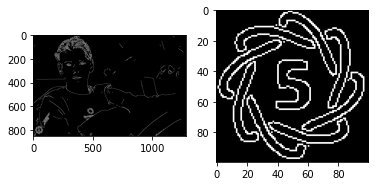

In [371]:
plt.subplot(121), plt.imshow(img,cmap = 'Greys_r')
plt.subplot(122), plt.imshow(template,cmap = 'Greys_r')

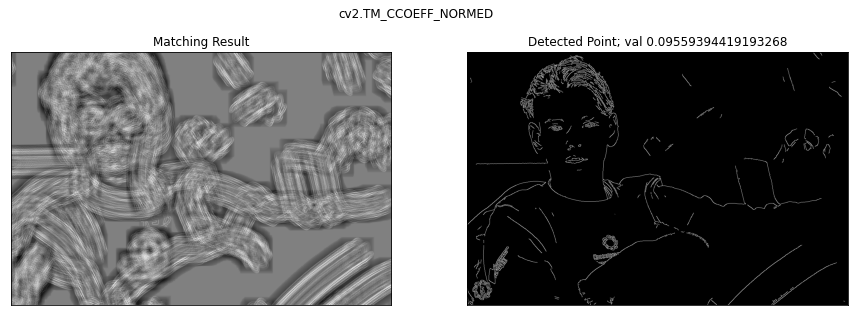

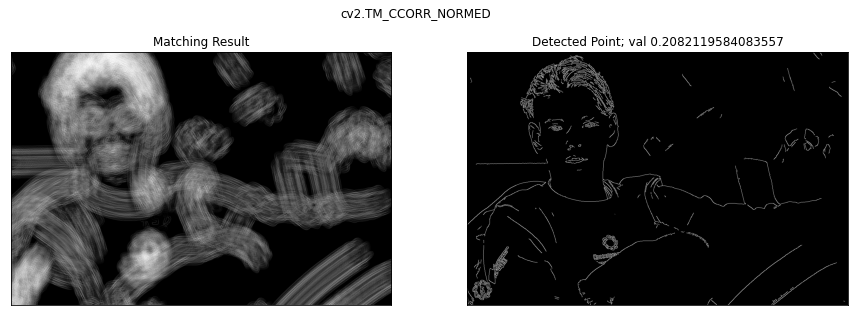

In [373]:
img2 = img.copy()

w, h = template.shape[::-1]
# methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR', 'cv2.TM_CCORR_NORMED']
eps = 0.05
methods = [('cv2.TM_CCOEFF_NORMED', 0.16 - eps), ('cv2.TM_CCORR_NORMED', 0.33 - eps)]
# methods = [('cv2.TM_CCOEFF_NORMED', 0.36 - eps), ('cv2.TM_CCORR_NORMED', 0.59 - eps)]


red = np.zeros((*img.shape, 3), dtype=np.uint8)
red[:] = [255, 0, 0]

for meth, thr in methods:
    plt.figure(figsize=(15, 5))
    img3 = img2.copy()
    method = eval(meth)
    # Apply template Matching
    res = cv2.matchTemplate(img3,template,method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    img_to_draw = np.repeat(img3[..., np.newaxis], 3, -1)
#     cv2.rectangle(img_to_draw, top_left, bottom_right, (255, 0, 0), 10)
    res = cv2.resize(res, img_to_draw.shape[:2][::-1])
    
    kernel = np.ones((50, 50),np.uint8)
    red_region = (res > thr).astype(np.uint8)
    red_region = cv2.dilate(red_region, kernel)
    
    img_to_draw = np.clip(img_to_draw + cv2.bitwise_and(red, red, mask=red_region), 0, 255)
    
#     img_to_draw[red_region] = [255, 0, 0]
    plt.subplot(121), plt.imshow(res,cmap = 'Greys_r')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(img_to_draw)
    plt.title(f'Detected Point; val {max_val}'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.show()
